In [168]:
from cellpose import plot, io, utils
import numpy as np
import skimage
import cv2
import matplotlib.pyplot as plt
import PIL
import glob
import os
from pathlib import Path

In [176]:
path = Path('/hpc/scratch/hdd2/fs541623/Pre_processed_Images/Time_4hrs_R1/Well_08/Cyt/Time_4hrs_R1_Well_08_Field_1_C3_cp_masks.png')

In [202]:
brightfield = '/hpc/scratch/hdd2/fs541623/Pre_processed_Images/Time_16hrs_R1/Well_08/Brightfield/Time_16hrs_R1_Well_08_Field_1_C1.tif'

In [194]:
img_list = sorted(glob.glob('/hpc/scratch/hdd2/fs541623/Pre_processed_Images/*/*/Cyt/*_cp_masks.png'), key=os.path.getctime)


Time_16hrs_R1_Well_08_Field_1_C3_cp_masks.png


In [197]:
for path in img_list:
    path = Path(path)
    img = skimage.io.imread(path)
    blurred_objects=cv2.GaussianBlur(img, ksize=(7,7), sigmaX=10)
    output=path.parent/(str(path.stem) + ('_blur' + path.suffix))
    skimage.io.imsave(arr=blurred_objects, fname=output)
    break

/home/fs541623/.conda/envs/cell_segmentation_12032021/lib/python3.7/site-packages/ipykernel/__main__.py:6: UserWarning: /hpc/scratch/hdd2/fs541623/Pre_processed_Images/Time_16hrs_R1/Well_08/Cyt/Time_16hrs_R1_Well_08_Field_1_C3_cp_masks_blur.png is a low contrast image


In [201]:
blurred_objects * 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [163]:
blurred_objects = cv2.GaussianBlur(fname, ksize=(7,7), sigmaX=10)

TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [123]:
skimage.io.imsave(arr=blurred_objects, fname='/hpc/scratch/hdd2/fs541623/test1.png')

/home/fs541623/.conda/envs/cell_segmentation_12032021/lib/python3.7/site-packages/ipykernel/__main__.py:1: UserWarning: /hpc/scratch/hdd2/fs541623/test1.png is a low contrast image
  if __name__ == '__main__':


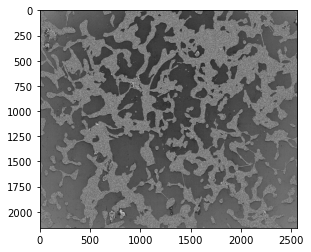

In [50]:
plt.imshow(np.uint8(img))

(2160, 2560) (2160, 2560)


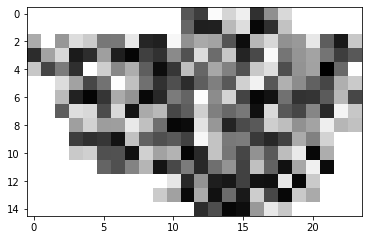

In [72]:
for idx, cell in enumerate(ls_outlines[:]):
    # mask outline
    mask = np.zeros(img.shape, dtype=np.uint8)
    cv2.fillConvexPoly(mask, cell, (255))
    print(img.shape, mask.shape)
    masked_image = img*mask
    
    # crop the cell
    x = cell.flatten()[::2]
    y = cell.flatten()[1::2]

    (topy, topx) = (np.min(y), np.min(x))
    (bottomy, bottomx) = (np.max(y), np.max(x))
    out = masked_image[topy:bottomy+1, topx:bottomx+1]
    
    # cv2.imwrite(os.path.join(name, str(idx) + ".png" ), out)
    break